# Initial Zillow GeoPackage Exploration

Load in necessary libraries. 

In [1]:
import os 
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr

import matplotlib.pyplot as plt

There are issues with reading in data. The next line of code was provided by Kat Le, the Bren Applications Manager. She explained the error that occurs when trying to read in geospatial data without this code occurs because the workbench cannot find PROJ at the expected location. This line of code pointed PROJ_LIB to a location on the machine where PROJ actually exists. **We can consider making our own environment for the ElectriGrid project.** 

In [2]:
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

In [3]:
# Read in the zillow geo data 
fp = os.path.join('data', 'final_zillow.gpkg')
zillowmap = gpd.read_file(fp)

In [4]:
# View the data frame
zillowmap.head()

,type,year,room,heat,cool,own,unit,value,sqft_type,sqft,ID,GEOID,p_ID,area,code,geometry
0,Multi,2003.0,1.0,None,None,I,224.0,491943.0,living,1003.0,3,06001403302,468,PGE/SCE,RR106,POINT (564447.371 4183243.435)
1,Multi,2003.0,1.0,None,None,None,224.0,240117.0,living,936.0,4,06001403302,468,PGE/SCE,RR106,POINT (564447.371 4183243.435)
2,Multi,2003.0,1.0,None,None,I,224.0,261770.0,living,997.0,5,06001403302,468,PGE/SCE,RR106,POINT (564447.371 4183243.435)
3,Multi,2003.0,1.0,None,None,None,224.0,223337.0,living,1002.0,6,06001403302,468,PGE/SCE,RR106,POINT (564447.371 4183243.435)
4,Multi,2003.0,1.0,None,None,None,224.0,241347.0,living,1003.0,7,06001403302,468,PGE/SCE,RR106,POINT (564449.237 4183218.817)


In [5]:
# check the crs
zillowmap.crs

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

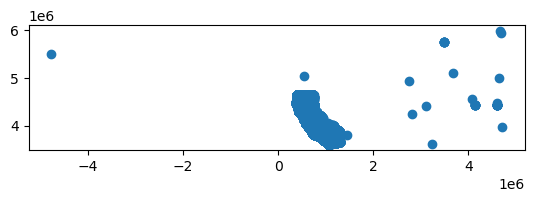

In [6]:
# initial plot 
zillowmap.plot()

### Zillow geodata issues
The Zillow data seems to include data from outside of California including a data point in Alaska. Exploring how to fix this geospatially using a boundary of California below

In [7]:
# read in California boundary data
fp = os.path.join('data', 'ca_state_boundary', 'ca_state_boundary.shp')
ca= gpd.read_file(fp)

<Axes: >

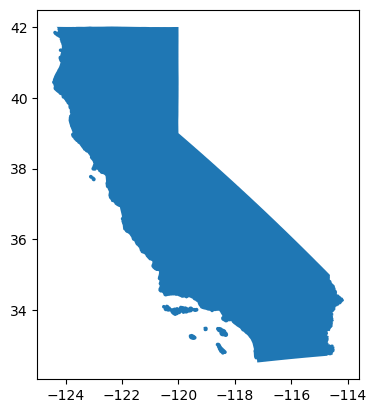

In [8]:
# initial plot of the CA boundary
ca.plot()

In [9]:
# check the ca crs 
ca.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
# check if the crs match
ca.crs == zillowmap.crs

False

### CRS mATCHING 
The CRS of the Zillowmap and the CA boundary do not match. To decide what CRS to keep we'll explore whether the CRS of each geodata is projected versus geographic. 


In [12]:
# check if zillowmap is in a projected CRS
zillowmap.crs.is_projected

True

We'll keep the CRS of the Zillowmap since its projected and much larger than the California boundary.

In [15]:
# change the CA boundary to the zillowmap CRS
ca = ca.to_crs(zillowmap.crs)

In [16]:
# Use an assert statement to make sure the CRS match
assert ca.crs == zillowmap.crs